In [24]:
!pip install spacy nltk svgling spacy-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 11.5 MB/s eta 0:00:00


In [25]:
!python -m spacy download en_core_web_sm

2023-12-18 19:55:07.444164: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 19:55:07.444229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 19:55:07.445990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 19:55:09.070808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
!python -m spacy download en_core_web_trf

2023-12-18 19:55:34.463451: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 19:55:34.463525: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 19:55:34.464811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 19:55:35.788684: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 14.4 MB/s eta 0:00:0

In [ ]:
## Spcay Models
#"language_type_genre_size"
# size => sm, md, lg, trf
# sm => Small
# md => Medium
# lg => Large
# trf => Transformer

In [27]:
import spacy
from spacy import displacy
from spacy import tokenizer
import spacy_transformers # Import if using Transformer based
# pre trained model, Even though not using this

In [28]:
nlp = spacy.load('en_core_web_sm')

In [29]:
trf_nlp = spacy.load('en_core_web_trf')

In [30]:
text = 'Elon Musk bought Twitter for $45 billion'

In [31]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [32]:
document = nlp(text)

In [33]:
document.doc # Sentences

Elon Musk bought Twitter for $45 billion

In [34]:
document.ents # Entity

(Elon Musk, Twitter, $45 billion)

In [35]:
for ent in document.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Elon Musk | PERSON | People, including fictional
Twitter | PRODUCT | Objects, vehicles, foods, etc. (not services)
$45 billion | MONEY | Monetary values, including unit


In [36]:
doc_trf = trf_nlp(text)

In [37]:
for ent in doc_trf.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Elon Musk | PERSON | People, including fictional
Twitter | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


In [38]:
displacy.render(document, style='ent', jupyter=True)

In [39]:
displacy.render(doc_trf, style='ent', jupyter=True)

In [40]:
document[0:2] # Word Indexing Not Character Indexing

Elon Musk

In [41]:
## Spacy Set Entities
from spacy.tokens import Span

s1 = doc_trf[2:3]
s1.label_ = "EVENT"
doc_trf.set_ents([s1], default='unmodified')

In [42]:
displacy.render(doc_trf, style='ent', jupyter=True)

![image.png](attachment:image.png)

In [43]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer

In [44]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [45]:
pos_tags = nltk.pos_tag(text.split())

In [46]:
pos_tags

[('Elon', 'NNP'),
 ('Musk', 'NNP'),
 ('bought', 'VBD'),
 ('Twitter', 'NNP'),
 ('for', 'IN'),
 ('$45', 'NNP'),
 ('billion', 'CD')]

In [47]:
import nltk
nltk.download('maxent_ne_chunker')



[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [48]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [49]:
named_ent = nltk.ne_chunk(pos_tags, binary=False)

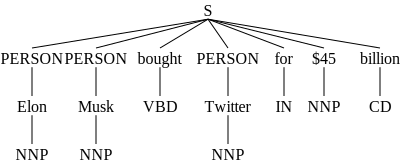

In [50]:
named_ent

In [51]:
#named_ent.draw()

In [52]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [53]:
trf_bert = pipeline("ner", model=model, tokenizer=tokenizer)

In [54]:
ner_results = trf_bert(text)
print(ner_results)

[{'entity': 'B-ORG', 'score': 0.99933904, 'index': 1, 'word': 'El', 'start': 0, 'end': 2}, {'entity': 'I-ORG', 'score': 0.998307, 'index': 2, 'word': '##on', 'start': 2, 'end': 4}, {'entity': 'I-ORG', 'score': 0.9988018, 'index': 3, 'word': 'Mu', 'start': 5, 'end': 7}, {'entity': 'I-ORG', 'score': 0.9941117, 'index': 4, 'word': '##sk', 'start': 7, 'end': 9}, {'entity': 'B-ORG', 'score': 0.99641824, 'index': 6, 'word': 'Twitter', 'start': 17, 'end': 24}]


# Custom Training for NER Using Spacy

https://newscatcherapi.com/blog/train-custom-named-entity-recognition-ner-model-with-spacy-v3

Dataset Link `: https://www.kaggle.com/datasets/finalepoch/medical-ner

In [55]:
import json
with open('/content/Corona2.json', 'r') as f:
    data = json.load(f)

In [56]:
d = {1:'One',2:'Two'}
ds = json.dumps(d)
dm = json.loads(ds)

In [57]:
{int(k):v for k,v in dm.items()}

{1: 'One', 2: 'Two'}

In [ ]:
#json.dumps(data)
# dumps => To memory
# dump => To file
# loads => from memory
#load => From file

In [58]:
data['examples'][0].keys()

dict_keys(['id', 'content', 'metadata', 'annotations', 'classifications'])

In [59]:
data['examples'][0]

{'id': '18c2f619-f102-452f-ab81-d26f7e283ffe',
 'content': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]",
 'metadata': {},
 'annotations': [{'id': '0825a1

In [60]:
data['examples'][0]['content'][383:408]

'aluminomagnesium silicate'

In [61]:
data['examples'][0]['annotations'][0]

{'id': '0825a1bf-6a6e-4fa2-be77-8d104701eaed',
 'tag_id': 'c06bd022-6ded-44a5-8d90-f17685bb85a1',
 'end': 371,
 'start': 360,
 'example_id': '18c2f619-f102-452f-ab81-d26f7e283ffe',
 'tag_name': 'Medicine',
 'value': 'Diosmectite',
 'correct': None,
 'human_annotations': [{'timestamp': '2020-03-21T00:24:32.098000Z',
   'annotator_id': 1,
   'tagged_token_id': '0825a1bf-6a6e-4fa2-be77-8d104701eaed',
   'name': 'Ashpat123',
   'reason': 'exploration'}],
 'model_annotations': []}

In [62]:
training_data = []
for example in data['examples']:
    temp_dict = {}
    temp_dict['text'] = example['content']
    temp_dict['entities'] = []
    for annotation in example['annotations']:
        start = annotation['start']
        end = annotation['end']
        label = annotation['tag_name'].upper()
        temp_dict['entities'].append((start, end, label))
    training_data.append(temp_dict)

In [63]:
training_data

[{'text': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]",
  'entities': [(360, 371, 'MEDICINE'),
   (383, 408, 'MEDICINE'),
   (104, 112, 'MEDICALCONDITION

In [64]:
training_data[0]['text'][360:371]

'Diosmectite'

In [65]:
import spacy

In [66]:
custom_ner = spacy.blank("en_custom_medical")

In [67]:
from spacy.tokens import DocBin
from spacy.util import filter_spans
from tqdm import tqdm

doc_bin = DocBin()
for training_example  in tqdm(training_data):
    text = training_example['text']
    labels = training_example['entities']
    doc = custom_ner.make_doc(text)
    ents = []
    for start, end, label in labels:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    filtered_ents = filter_spans(ents)
    doc.ents = filtered_ents
    doc_bin.add(doc)

doc_bin.to_disk("train.spacy")

 13%|█▎        | 4/31 [00:00<00:00, 29.69it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 55%|█████▍    | 17/31 [00:00<00:00, 52.09it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


100%|██████████| 31/31 [00:00<00:00, 62.07it/s]


https://spacy.io/usage/training#quickstart

In [68]:
!python -m spacy init fill-config base_config.cfg config.cfg

2023-12-18 19:57:25.251086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 19:57:25.251144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 19:57:25.256444: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 19:57:28.386714: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [71]:
!python -m spacy download en_core_web_lg


2023-12-18 19:59:22.321103: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 19:59:22.321182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 19:59:22.323080: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 19:59:25.088915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [73]:
!python -m spacy train config.cfg --output ./ --paths.train ./train.spacy --paths.dev ./train.spacy

2023-12-18 20:00:43.025868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 20:00:43.025936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 20:00:43.027273: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 20:00:44.305725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['to

In [74]:
nlp_ner = spacy.load("model-best")

In [75]:
doc = nlp_ner("While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.")

colors = {"PATHOGEN": "#F67DE3", "MEDICINE": "#7DF6D9", "MEDICALCONDITION":"#a6e22d"}
options = {"colors": colors}

displacy.render(doc, style="ent", options= options, jupyter=True)

In [76]:
for ents in doc.ents:
    print(ents.text, end=' | ')
    print(ents.label_)

bismuth compounds | MEDICINE
Pepto-Bismol | MEDICINE
diarrhea | MEDICALCONDITION
loperamide | MEDICINE


https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus?resource=download

In [ ]:
import pandas as pd
df = pd.read_csv("NER_TF/ner_dataset.csv", encoding="windows-1252")

In [ ]:
df['Tag'].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

+ geo = Geographical Entity
+ org = Organization
+ per = Person
+ gpe = Geopolitical Entity
+ tim = Time indicator
+ art = Artifact
+ eve = Event
+ nat = Natural Phenomenon

## BILOU tags in NER
+ B - 'beginning'
+ I - 'inside'
+ L - 'last'
+ O - 'outside'
+ U - 'unit'
+ E - 'end', use it concurrently with the 'last' tag
+ S - 'singleton', use it concurrently with the 'unit' tag

BILOU Method/Schema

 | ------|--------------------|
 | BEGIN | The first token    |
 | ------|--------------------|
 | IN    | An inner token     |
 | ------|--------------------|
 | LAST  | The final token    |
 | ------|--------------------|
 | Unit  | A single-token     |
 | ------|--------------------|
 | Out   | A non-entity token |
 | ------|--------------------|

(foo foo foo) (bar) no no no (bar bar)


B-foo, I-foo, L-foo, U-bar, O, O, O, B-bar, L-bar

https://en.wikipedia.org/wiki/Inside%E2%80%93outside%E2%80%93beginning_(tagging)

https://towardsdatascience.com/deep-learning-for-ner-1-public-datasets-and-annotation-methods-8b1ad5e98caf